In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv('train.csv')
data

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


client_id - идентификатор клиента

education - уровень образования

sex - пол заемщика

age - возраст заемщика

car - флаг наличия автомобиля

car_type - флаг автомобиля иномарки

decline_app_cnt - количество отказанных прошлых заявок

good_work - флаг наличия «хорошей» работы

bki_request_cnt - количество запросов в БКИ

home_address - категоризатор домашнего адреса

work_address - категоризатор рабочего адреса

income - доход заемщика

foreign_passport - наличие загранпаспорта

sna - связь заемщика с клиентами банка

first_time - давность наличия информации о заемщике

score_bki - скоринговый балл по данным из БКИ

region_rating - рейтинг региона

app_date - дата подачи заявки

default - флаг дефолта по кредиту

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [4]:
data.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

<AxesSubplot:>

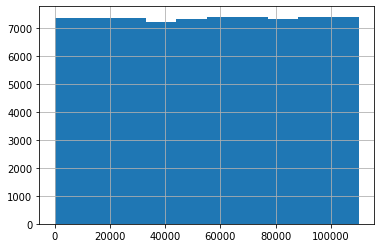

In [5]:
data = data.dropna()                   
data['client_id'].hist()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73492 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73492 non-null  int64  
 1   app_date          73492 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73492 non-null  object 
 4   age               73492 non-null  int64  
 5   car               73492 non-null  object 
 6   car_type          73492 non-null  object 
 7   decline_app_cnt   73492 non-null  int64  
 8   good_work         73492 non-null  int64  
 9   score_bki         73492 non-null  float64
 10  bki_request_cnt   73492 non-null  int64  
 11  region_rating     73492 non-null  int64  
 12  home_address      73492 non-null  int64  
 13  work_address      73492 non-null  int64  
 14  income            73492 non-null  int64  
 15  sna               73492 non-null  int64  
 16  first_time        73492 non-null  int64 

In [7]:
data = data.drop(['client_id'], axis=1)

<AxesSubplot:>

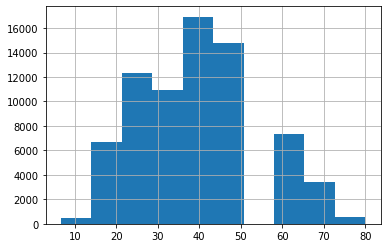

In [8]:
data['region_hom'] = data['region_rating'] / data['home_address']
data['region_hom'].hist()

<AxesSubplot:>

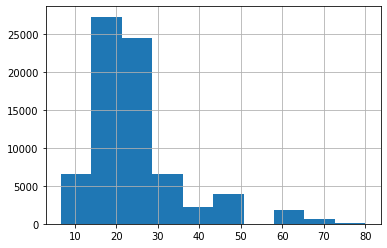

In [9]:
data['region_work'] = data['region_rating'] / data['work_address']
data['region_work'].hist()

In [10]:
data.columns

Index(['app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default', 'region_hom',
       'region_work'],
      dtype='object')

<AxesSubplot:>

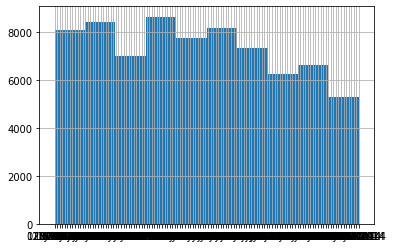

In [11]:
data['app_date'].hist()

In [12]:
data['app_date'] = pd.to_datetime(data['app_date'])

In [13]:
data['app_date']

0       2014-02-01
1       2014-03-12
2       2014-02-01
3       2014-01-23
4       2014-04-18
           ...    
73794   2014-03-04
73795   2014-03-24
73796   2014-04-22
73797   2014-01-04
73798   2014-01-23
Name: app_date, Length: 73492, dtype: datetime64[ns]

<AxesSubplot:>

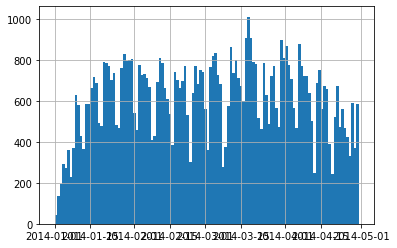

In [14]:
data['app_date'].hist(bins=120)

In [15]:
 data['app_date'].describe()

count                   73492
unique                    120
top       2014-03-18 00:00:00
freq                     1012
first     2014-01-01 00:00:00
last      2014-04-30 00:00:00
Name: app_date, dtype: object

In [16]:
data['app_date'].min()

Timestamp('2014-01-01 00:00:00')

In [17]:
data['app_date'].max() - data['app_date'].min()

Timedelta('119 days 00:00:00')

In [18]:
data['app_date'].value_counts()

2014-03-18    1012
2014-03-19     907
2014-03-17     907
2014-03-31     897
2014-04-07     880
              ... 
2014-04-20     242
2014-01-07     227
2014-01-03     193
2014-01-02     137
2014-01-01      43
Name: app_date, Length: 120, dtype: int64

<AxesSubplot:>

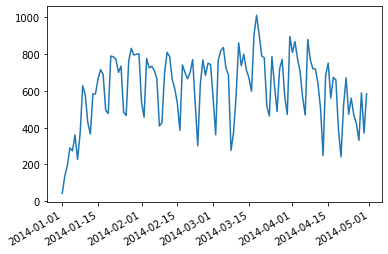

In [19]:
data['app_date'].value_counts().plot()

<AxesSubplot:>

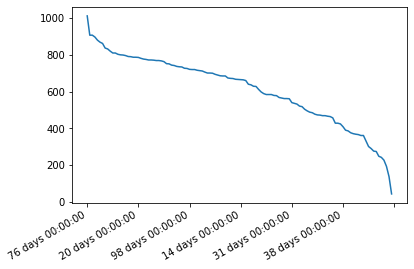

In [20]:
(data['app_date'] - data['app_date'].min()).value_counts().plot()

<AxesSubplot:>

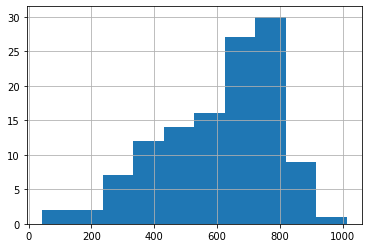

In [21]:
(data['app_date'] - data['app_date'].min()).value_counts().hist()

In [22]:
data['app_date'] - data['app_date'].min()


0        31 days
1        70 days
2        31 days
3        22 days
4       107 days
          ...   
73794    62 days
73795    82 days
73796   111 days
73797     3 days
73798    22 days
Name: app_date, Length: 73492, dtype: timedelta64[ns]

In [23]:
data['app_date'] = (data['app_date'] - data['app_date'].min()).apply(lambda x:  x.days)
data['app_date']

0         31
1         70
2         31
3         22
4        107
        ... 
73794     62
73795     82
73796    111
73797      3
73798     22
Name: app_date, Length: 73492, dtype: int64

<AxesSubplot:>

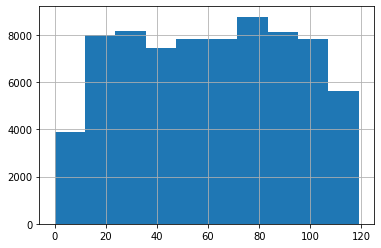

In [24]:
data['app_date'].hist()

<AxesSubplot:>

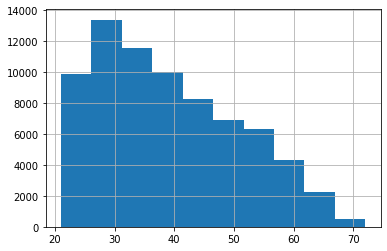

In [25]:
data['age'].hist()

<AxesSubplot:>

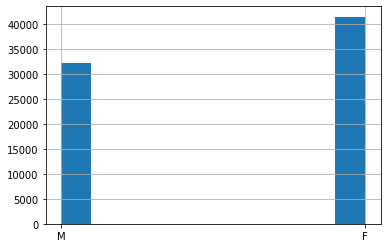

In [26]:
data['sex'].hist()

<AxesSubplot:>

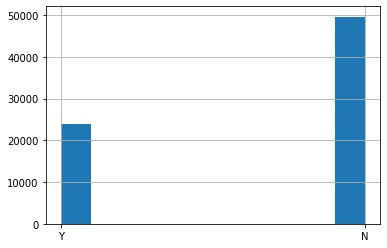

In [27]:
data['car'].hist()

<AxesSubplot:>

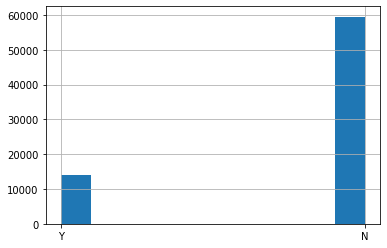

In [28]:
data['car_type'].hist()

<AxesSubplot:>

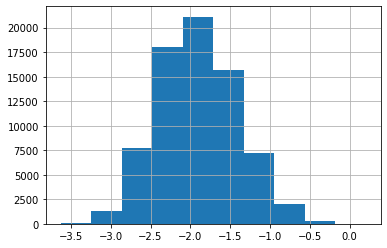

In [29]:
data['score_bki'].hist()


<AxesSubplot:>

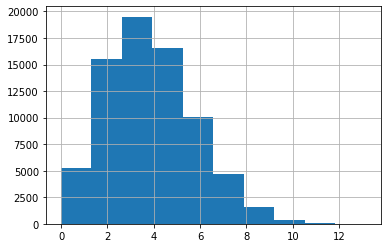

In [30]:
data['score_bki'] = data['score_bki']**2
data['score_bki'].hist()

<AxesSubplot:>

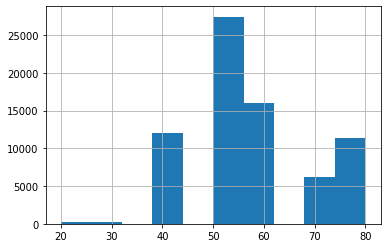

In [31]:
data['region_rating'].hist()

<AxesSubplot:>

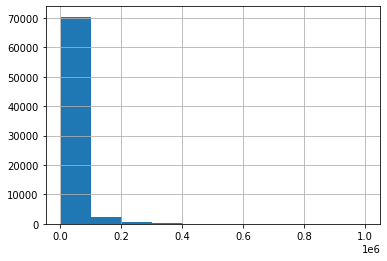

In [32]:
data['income'].hist()

<AxesSubplot:>

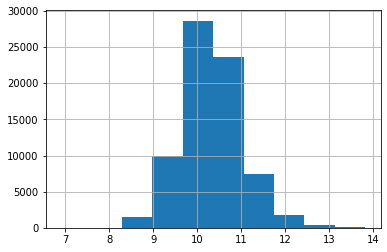

In [33]:
data['income'] = np.log(data['income'])
data['income'].hist()

0    64155
1     9337
Name: default, dtype: int64

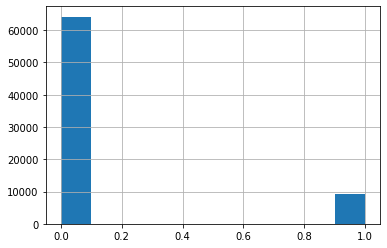

In [34]:
data['default'].hist()
data['default'].value_counts()

0     60931
1      8379
2      2464
3       901
4       414
5       165
6       113
7        48
9        24
8        19
10       11
11        9
13        3
12        2
14        2
16        2
24        1
15        1
19        1
22        1
33        1
Name: decline_app_cnt, dtype: int64

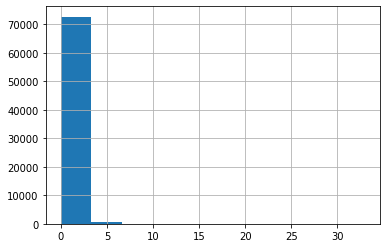

In [35]:
data['decline_app_cnt'].hist()
data['decline_app_cnt'].value_counts()

<AxesSubplot:>

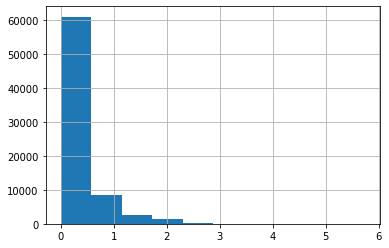

In [36]:
data['decline_app_cnt'] = np.sqrt(data['decline_app_cnt'])
data['decline_app_cnt'].hist()

0     19282
1     18200
2     13694
3      9153
4      5612
5      3260
6      1697
7       847
8       505
9       299
10      223
11      188
12      143
13       93
14       85
15       54
16       35
18       22
17       19
19       18
21       12
24       11
20        9
23        7
28        4
22        4
32        2
27        2
26        2
25        2
46        1
29        1
33        1
34        1
36        1
41        1
45        1
53        1
Name: bki_request_cnt, dtype: int64

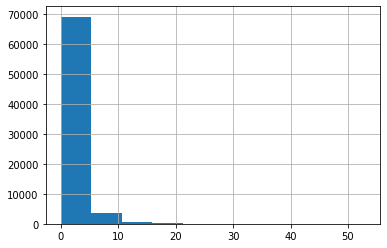

In [37]:
data['bki_request_cnt'].hist()
data['bki_request_cnt'].value_counts()

<AxesSubplot:>

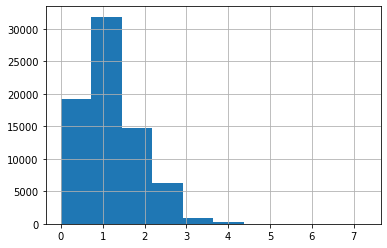

In [38]:
data['bki_request_cnt'] = np.sqrt(data['bki_request_cnt'])
data['bki_request_cnt'].hist()

<AxesSubplot:>

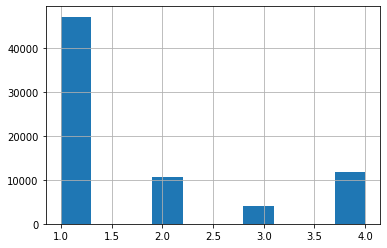

In [39]:
data['sna'].hist()

<AxesSubplot:>

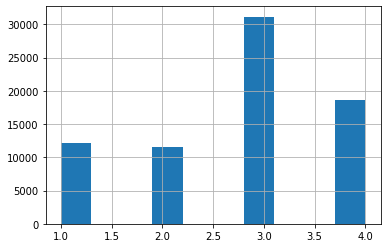

In [40]:
data['first_time'].hist()

In [41]:
label_encoder = LabelEncoder()
bin_cols = data[[ 'sex', 'car_type', 'car', 'good_work', 'foreign_passport', 'default']]
for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])

data

,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,region_hom,region_work
0,31,SCH,1,62,1,1,0.000000,0,4.035088,1.000000,50,1,2,9.798127,4,1,0,0,50.0,25.000000
1,70,SCH,0,59,0,0,0.000000,0,2.347870,1.732051,50,2,3,9.852194,4,1,0,0,25.0,16.666667
2,31,SCH,1,25,1,0,1.414214,0,1.982865,1.000000,80,1,2,10.308953,1,4,1,0,80.0,40.000000
3,22,SCH,0,53,0,0,0.000000,0,4.233188,1.414214,50,2,3,9.210340,1,3,0,0,25.0,16.666667
4,107,GRD,1,48,0,0,0.000000,1,1.549335,1.000000,60,2,3,10.308953,1,4,1,0,30.0,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,62,GRD,0,45,0,0,0.000000,0,3.211495,1.732051,50,1,2,9.740969,4,4,0,0,50.0,25.000000
73795,82,SCH,1,41,1,1,0.000000,0,4.235484,1.000000,50,2,2,11.156251,1,4,0,0,25.0,25.000000
73796,111,SCH,1,31,0,0,0.000000,0,2.288064,2.000000,80,2,3,10.714418,2,2,0,0,40.0,26.666667
73797,3,SCH,0,29,0,0,0.000000,1,2.188428,1.732051,50,1,3,9.472705,2,3,0,1,50.0,16.666667


In [42]:
data.columns

Index(['app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default', 'region_hom',
       'region_work'],
      dtype='object')

In [43]:
cat_cols = ['education', 'work_address', 'home_address']          
data_dumm = pd.get_dummies(data, columns=cat_cols)
data_dumm

,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,...,education_GRD,education_PGR,education_SCH,education_UGR,work_address_1,work_address_2,work_address_3,home_address_1,home_address_2,home_address_3
0,31,1,62,1,1,0.000000,0,4.035088,1.000000,50,...,0,0,1,0,0,1,0,1,0,0
1,70,0,59,0,0,0.000000,0,2.347870,1.732051,50,...,0,0,1,0,0,0,1,0,1,0
2,31,1,25,1,0,1.414214,0,1.982865,1.000000,80,...,0,0,1,0,0,1,0,1,0,0
3,22,0,53,0,0,0.000000,0,4.233188,1.414214,50,...,0,0,1,0,0,0,1,0,1,0
4,107,1,48,0,0,0.000000,1,1.549335,1.000000,60,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,62,0,45,0,0,0.000000,0,3.211495,1.732051,50,...,1,0,0,0,0,1,0,1,0,0
73795,82,1,41,1,1,0.000000,0,4.235484,1.000000,50,...,0,0,1,0,0,1,0,0,1,0
73796,111,1,31,0,0,0.000000,0,2.288064,2.000000,80,...,0,0,1,0,0,0,1,0,1,0
73797,3,0,29,0,0,0.000000,1,2.188428,1.732051,50,...,0,0,1,0,0,0,1,1,0,0


In [44]:
y_all = data_dumm['default']
X_all = data_dumm.drop(['default'], axis=1)

<AxesSubplot:>

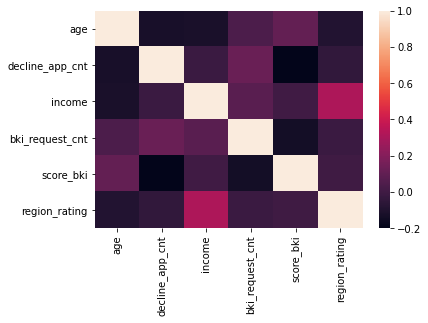

In [45]:
num_cols = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt', 'score_bki', 'region_rating']   
sns.heatmap(data_dumm[num_cols].corr())

In [46]:
data_dumm_1 = data_dumm[data_dumm['default']==1]
data_dumm_1

,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,...,education_GRD,education_PGR,education_SCH,education_UGR,work_address_1,work_address_2,work_address_3,home_address_1,home_address_2,home_address_3
18,32,0,36,0,0,0.0,0,3.888419,2.000000,40,...,1,0,0,0,0,0,1,1,0,0
23,58,1,27,1,1,0.0,0,4.746036,1.000000,50,...,0,0,1,0,0,0,1,0,1,0
24,41,0,26,0,0,0.0,0,2.063761,1.000000,60,...,0,0,1,0,0,1,0,1,0,0
32,60,1,62,0,0,0.0,0,7.967874,0.000000,40,...,1,0,0,0,0,0,1,0,1,0
44,55,0,38,0,0,0.0,0,3.664550,2.236068,60,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73758,73,1,35,0,0,0.0,0,2.707582,2.000000,40,...,0,0,0,1,0,0,1,0,1,0
73778,11,0,41,0,0,0.0,0,1.435866,1.732051,60,...,0,0,1,0,1,0,0,1,0,0
73779,75,1,42,1,1,0.0,0,2.733185,1.732051,70,...,0,0,1,0,0,0,1,0,1,0
73786,47,0,51,0,0,0.0,0,1.585084,2.000000,30,...,1,0,0,0,0,0,1,0,1,0


In [47]:
data_dumm_0 = data_dumm[data_dumm['default']==0][:9337]
data_dumm_0

,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,...,education_GRD,education_PGR,education_SCH,education_UGR,work_address_1,work_address_2,work_address_3,home_address_1,home_address_2,home_address_3
0,31,1,62,1,1,0.000000,0,4.035088,1.000000,50,...,0,0,1,0,0,1,0,1,0,0
1,70,0,59,0,0,0.000000,0,2.347870,1.732051,50,...,0,0,1,0,0,0,1,0,1,0
2,31,1,25,1,0,1.414214,0,1.982865,1.000000,80,...,0,0,1,0,0,1,0,1,0,0
3,22,0,53,0,0,0.000000,0,4.233188,1.414214,50,...,0,0,1,0,0,0,1,0,1,0
4,107,1,48,0,0,0.000000,1,1.549335,1.000000,60,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693,12,1,30,1,1,0.000000,0,3.524779,1.000000,60,...,0,0,1,0,1,0,0,1,0,0
10694,108,0,31,0,0,0.000000,0,5.901819,1.414214,40,...,1,0,0,0,0,0,1,0,1,0
10695,21,0,27,0,0,0.000000,1,3.198230,2.000000,80,...,1,0,0,0,0,0,1,0,1,0
10696,40,0,62,0,0,0.000000,0,6.384394,1.414214,40,...,1,0,0,0,1,0,0,1,0,0


In [48]:
data_dumm_01 = pd.concat([data_dumm_1, data_dumm_0])
data_dumm_01

,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,...,education_GRD,education_PGR,education_SCH,education_UGR,work_address_1,work_address_2,work_address_3,home_address_1,home_address_2,home_address_3
18,32,0,36,0,0,0.0,0,3.888419,2.000000,40,...,1,0,0,0,0,0,1,1,0,0
23,58,1,27,1,1,0.0,0,4.746036,1.000000,50,...,0,0,1,0,0,0,1,0,1,0
24,41,0,26,0,0,0.0,0,2.063761,1.000000,60,...,0,0,1,0,0,1,0,1,0,0
32,60,1,62,0,0,0.0,0,7.967874,0.000000,40,...,1,0,0,0,0,0,1,0,1,0
44,55,0,38,0,0,0.0,0,3.664550,2.236068,60,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693,12,1,30,1,1,0.0,0,3.524779,1.000000,60,...,0,0,1,0,1,0,0,1,0,0
10694,108,0,31,0,0,0.0,0,5.901819,1.414214,40,...,1,0,0,0,0,0,1,0,1,0
10695,21,0,27,0,0,0.0,1,3.198230,2.000000,80,...,1,0,0,0,0,0,1,0,1,0
10696,40,0,62,0,0,0.0,0,6.384394,1.414214,40,...,1,0,0,0,1,0,0,1,0,0


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='decline_app_cnt', ylabel='age'>,
        <AxesSubplot:xlabel='income', ylabel='age'>,
        <AxesSubplot:xlabel='bki_request_cnt', ylabel='age'>,
        <AxesSubplot:xlabel='score_bki', ylabel='age'>,
        <AxesSubplot:xlabel='region_rating', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='decline_app_cnt'>,
        <AxesSubplot:xlabel='decline_app_cnt', ylabel='decline_app_cnt'>,
        <AxesSubplot:xlabel='income', ylabel='decline_app_cnt'>,
        <AxesSubplot:xlabel='bki_request_cnt', ylabel='decline_app_cnt'>,
        <AxesSubplot:xlabel='score_bki', ylabel='decline_app_cnt'>,
        <AxesSubplot:xlabel='region_rating', ylabel='decline_app_cnt'>],
       [<AxesSubplot:xlabel='age', ylabel='income'>,
        <AxesSubplot:xlabel='decline_app_cnt', ylabel='income'>,
        <AxesSubplot:xlabel='income', ylabel='income'>,
        <AxesSubplot:xlabel='bki_request_cnt', ylabel='income'>,
 

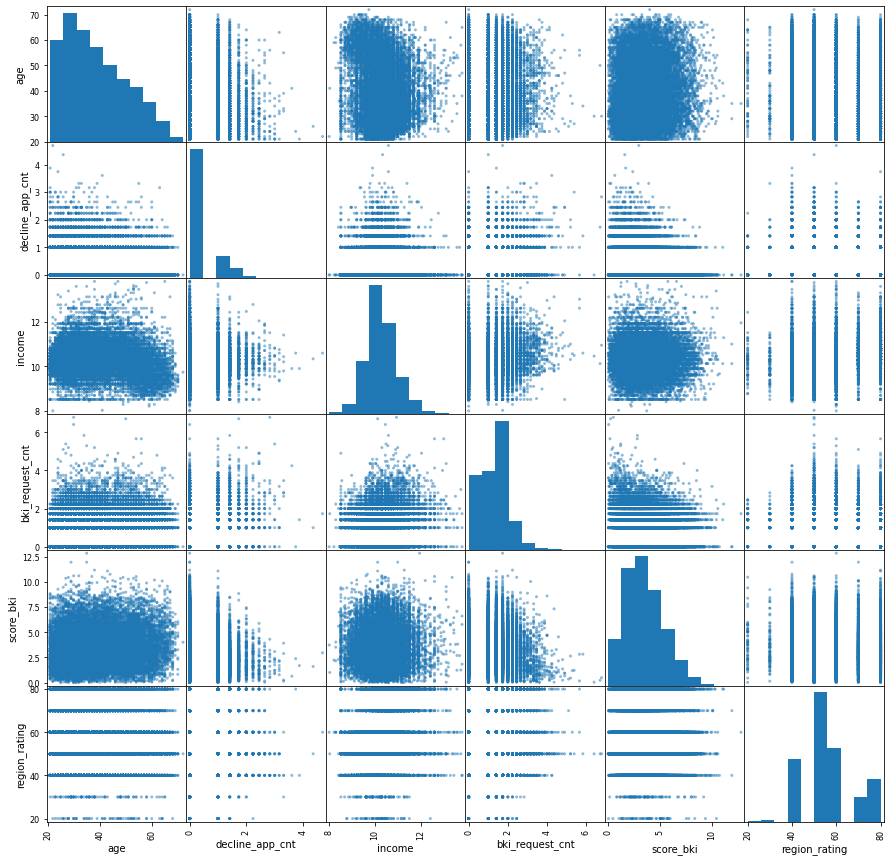

In [49]:
scatter_matrix(data_dumm_01[num_cols], figsize=(15,15))

In [50]:
data_dumm_01

,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,...,education_GRD,education_PGR,education_SCH,education_UGR,work_address_1,work_address_2,work_address_3,home_address_1,home_address_2,home_address_3
18,32,0,36,0,0,0.0,0,3.888419,2.000000,40,...,1,0,0,0,0,0,1,1,0,0
23,58,1,27,1,1,0.0,0,4.746036,1.000000,50,...,0,0,1,0,0,0,1,0,1,0
24,41,0,26,0,0,0.0,0,2.063761,1.000000,60,...,0,0,1,0,0,1,0,1,0,0
32,60,1,62,0,0,0.0,0,7.967874,0.000000,40,...,1,0,0,0,0,0,1,0,1,0
44,55,0,38,0,0,0.0,0,3.664550,2.236068,60,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693,12,1,30,1,1,0.0,0,3.524779,1.000000,60,...,0,0,1,0,1,0,0,1,0,0
10694,108,0,31,0,0,0.0,0,5.901819,1.414214,40,...,1,0,0,0,0,0,1,0,1,0
10695,21,0,27,0,0,0.0,1,3.198230,2.000000,80,...,1,0,0,0,0,0,1,0,1,0
10696,40,0,62,0,0,0.0,0,6.384394,1.414214,40,...,1,0,0,0,1,0,0,1,0,0


In [51]:
y = data_dumm_01['default']
X = data_dumm_01.drop(['default'], axis=1)

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,stratify=y, random_state=42)
clf = RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=-1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
print(clf.score(X_train, y_train))
print(clf.score(X_valid, y_valid))

0.7836535243322846
0.694243641231593


In [53]:
print(accuracy_score(y_valid,y_pred))
print(precision_score(y_valid,y_pred))
print(recall_score(y_valid,y_pred))
print(f1_score(y_valid,y_pred))

0.694243641231593
0.6949973103819258
0.692019282271023
0.6935050993022007


In [54]:
confusion_matrix( y_valid, y_pred)

array([[1301,  567],
       [ 575, 1292]], dtype=int64)

<AxesSubplot:>

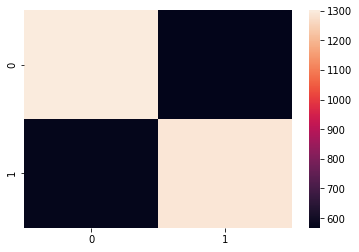

In [55]:
sns.heatmap(confusion_matrix(y_valid, y_pred))

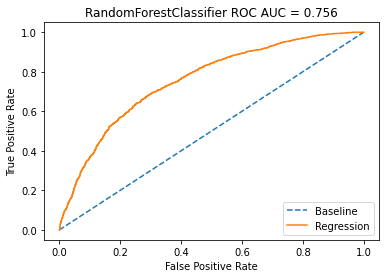

0.7561745245094273

In [56]:
probs = clf.predict_proba(X_valid)
 
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('RandomForestClassifier ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

roc_auc = roc_auc_score(y_valid, probs)
roc_auc

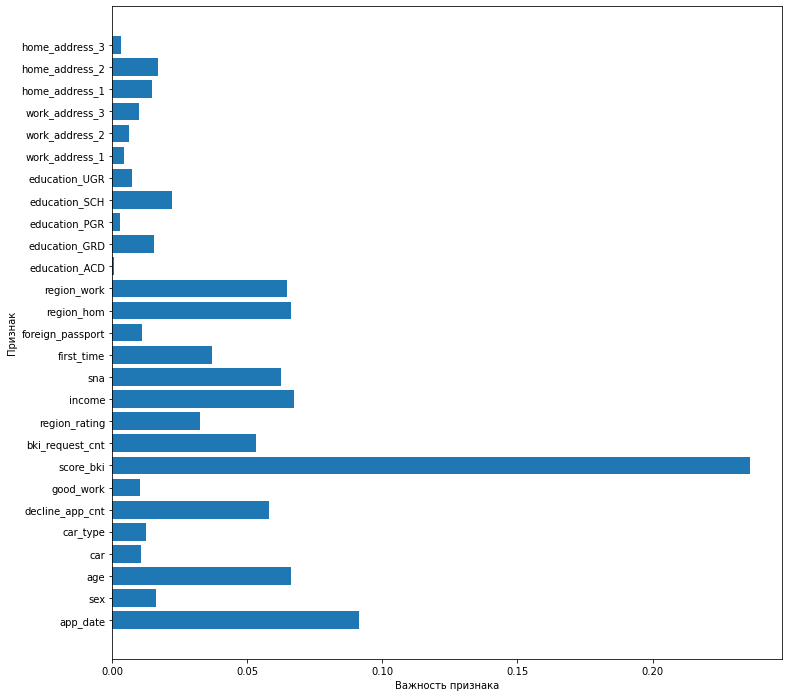

In [57]:
def plot_feature_importances_df(model):
 n_features = X.shape[1]
 fig = plt.figure(figsize=(12,12))
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), data_dumm_01.drop(['default'], axis=1))
 plt.xlabel("Важность признака")
 plt.ylabel("Признак")
plot_feature_importances_df(clf)

 


In [58]:
X_train_a, X_valid_a, y_train_a, y_valid_a = train_test_split(X_all, y_all, train_size=0.8, random_state=42)
clf = RandomForestClassifier(n_estimators=400,  random_state=0, max_depth=22)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_valid_a)
print(clf.score(X_train_a, y_train_a))
print(clf.score(X_valid_a, y_valid_a))

0.7253584610412804
0.7316143955371114


In [59]:
y_predicted = clf.predict(X_valid_a)
confusion_matrix( y_valid_a, y_predicted)

array([[9000, 3822],
       [ 123, 1754]], dtype=int64)

<AxesSubplot:>

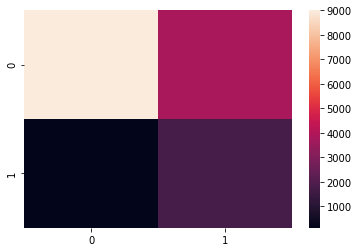

In [60]:
sns.heatmap(confusion_matrix(y_valid_a, y_predicted))


In [61]:
print(accuracy_score(y_valid_a,y_predicted))
print(precision_score(y_valid_a,y_predicted))
print(recall_score(y_valid_a,y_predicted))
print(f1_score(y_valid_a,y_predicted))

0.7316143955371114
0.31456241032998566
0.9344698987746404
0.470682946464511


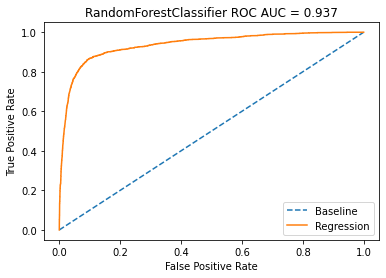

0.9366824194264536

In [62]:
probs = clf.predict_proba(X_valid_a)
 
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_valid_a, probs)
roc_auc = roc_auc_score(y_valid_a, probs)
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('RandomForestClassifier ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

roc_auc = roc_auc_score(y_valid_a, probs)
roc_auc

In [63]:
print(clf.score(X_all, y_all))

0.7266096990148587


In [64]:
y_predicted = clf.predict(X_all)
confusion_matrix( y_all, y_predicted)

array([[44654, 19501],
       [  591,  8746]], dtype=int64)

<AxesSubplot:>

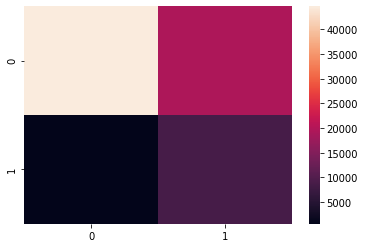

In [65]:
sns.heatmap(confusion_matrix(y_all, y_predicted))

In [66]:
print(accuracy_score(y_all, y_predicted))
print(precision_score(y_all, y_predicted))
print(recall_score(y_all, y_predicted))
print(f1_score(y_all, y_predicted))

0.7266096990148587
0.3096258009700145
0.9367034379350969
0.4654108131119625


In [67]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],}
print("Сетка параметров:\n{}".format(param_grid))
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [69]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [70]:
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

Правильность на тестовом наборе: 0.67


In [71]:
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 0.1}
Наилучшее значение кросс-валидац. правильности: 0.67


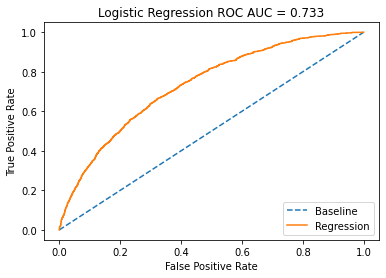

0.7325050278181471

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_scaled, y_train)
probs = logreg.predict_proba(X_test_scaled)
 
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

roc_auc = roc_auc_score(y_test, probs)
roc_auc

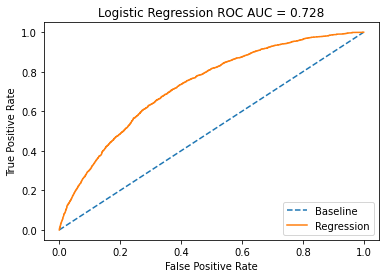

0.7279972510227046

In [73]:
y_all = data_dumm['default']
X_all = data_dumm.drop(['default'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_all, y_all, train_size=0.8, random_state=12)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_valid)
#logreg = LogisticRegression(C=0.1)
logreg.fit(X_train, y_train)
probs = logreg.predict_proba(X_test)
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

roc_auc = roc_auc_score(y_valid, probs)
roc_auc

In [74]:
y_predicted = logreg.predict(X_test)

print(accuracy_score(y_valid,y_predicted))
print(precision_score(y_valid,y_predicted))
print(recall_score(y_valid,y_predicted))
print(f1_score(y_valid,y_predicted))

0.871011633444452
0.4492753623188406
0.01641079936474325
0.03166496424923391


In [75]:
confusion_matrix( y_valid, y_predicted)

array([[12772,    38],
       [ 1858,    31]], dtype=int64)